<a href="https://colab.research.google.com/github/Mayank-004/Timeseries-classification-using-XGBOOST/blob/main/Time%20series%20Data%20Analysis%20after%20Feature%20Eng.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing 




## Importing the libraries

In [203]:
import random

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import matplotlib
from sklearn.metrics import auc
from numpy import abs

random.seed(786)
import time
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler

from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, plot_confusion_matrix, plot_roc_curve,precision_recall_curve,plot_precision_recall_curve




## Importing the dataset







In [204]:
from scipy.io import arff

data_train = arff.loadarff('LargeKitchenAppliances_TRAIN.arff')
data_test = arff.loadarff('LargeKitchenAppliances_TEST.arff')

dataset = pd.DataFrame(data_train[0])
test = pd.DataFrame(data_test[0])


dataset

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,att11,att12,att13,att14,att15,att16,att17,att18,att19,att20,att21,att22,att23,att24,att25,att26,att27,att28,att29,att30,att31,att32,att33,att34,att35,att36,att37,att38,att39,att40,...,att682,att683,att684,att685,att686,att687,att688,att689,att690,att691,att692,att693,att694,att695,att696,att697,att698,att699,att700,att701,att702,att703,att704,att705,att706,att707,att708,att709,att710,att711,att712,att713,att714,att715,att716,att717,att718,att719,att720,target
0,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,...,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,b'1'
1,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,...,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,b'1'
2,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,...,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,b'1'
3,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,...,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,b'1'
4,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.14057

In [32]:
test

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,att11,att12,att13,att14,att15,att16,att17,att18,att19,att20,att21,att22,att23,att24,att25,att26,att27,att28,att29,att30,att31,att32,att33,att34,att35,att36,att37,att38,att39,att40,...,att682,att683,att684,att685,att686,att687,att688,att689,att690,att691,att692,att693,att694,att695,att696,att697,att698,att699,att700,att701,att702,att703,att704,att705,att706,att707,att708,att709,att710,att711,att712,att713,att714,att715,att716,att717,att718,att719,att720,target
0,-0.152284,-0.137194,-0.137194,-0.152284,-0.137194,-0.152284,-0.137194,-0.152284,-0.137194,-0.152284,-0.137194,-0.152284,-0.137194,-0.152284,-0.137194,-0.152284,-0.137194,-0.152284,-0.137194,-0.152284,-0.137194,-0.152284,-0.137194,-0.152284,-0.137194,-0.152284,-0.137194,-0.152284,-0.137194,-0.152284,-0.137194,-0.152284,-0.137194,-0.152284,-0.137194,-0.152284,-0.137194,-0.152284,-0.137194,-0.152284,...,-0.137194,-0.137194,-0.137194,-0.152284,-0.137194,-0.137194,-0.137194,-0.152284,-0.137194,-0.137194,-0.137194,-0.137194,-0.152284,-0.137194,-0.137194,-0.137194,-0.031563,7.090963,9.082856,9.082856,8.826325,8.826325,0.209878,0.074067,3.167537,0.119338,0.074067,0.074067,0.119338,0.209878,0.209878,0.602221,0.074067,0.119338,0.164608,0.209878,0.451320,0.934203,0.270239,b'1'
1,-0.227902,-0.227902,-0.227902,-0.227902,-0.237783,-0.227902,-0.227902,-0.227902,-0.227902,-0.237783,-0.227902,-0.227902,-0.237783,-0.227902,-0.227902,-0.227902,-0.237783,-0.227902,-0.227902,-0.227902,-0.237783,-0.227902,-0.227902,-0.227902,-0.237783,-0.227902,-0.227902,-0.237783,-0.227902,-0.227902,-0.227902,-0.237783,-0.227902,-0.227902,-0.227902,-0.227902,-0.237783,-0.227902,-0.227902,-0.227902,...,-0.227902,-0.227902,-0.237783,-0.227902,-0.227902,-0.227902,-0.237783,-0.227902,-0.227902,-0.227902,-0.227902,-0.237783,-0.227902,-0.227902,-0.227902,-0.227902,-0.237783,-0.227902,-0.227902,-0.227902,-0.237783,-0.227902,-0.227902,-0.227902,-0.227902,-0.237783,-0.227902,-0.227902,-0.227902,-0.237783,-0.227902,-0.227902,-0.227902,-0.237783,-0.227902,-0.227902,-0.227902,-0.237783,-0.227902,b'1'
2,-0.191919,-0.191919,-0.191919,-0.204101,-0.191919,-0.191919,-0.191919,-0.204101,-0.191919,-0.191919,-0.191919,-0.204101,-0.191919,-0.191919,-0.191919,-0.204101,-0.191919,-0.191919,-0.191919,-0.191919,-0.204101,-0.191919,-0.191919,-0.191919,-0.191919,-0.204101,-0.191919,-0.191919,-0.191919,-0.191919,-0.204101,-0.191919,-0.191919,-0.191919,-0.204101,-0.191919,-0.191919,-0.191919,-0.191919,-0.204101,...,-0.191919,-0.204101,-0.191919,-0.191919,-0.191919,-0.204101,-0.191919,-0.191919,-0.191919,-0.204101,-0.191919,-0.191919,-0.191919,-0.191919,-0.204101,-0.191919,-0.191919,-0.191919,-0.191919,-0.204101,-0.191919,-0.191919,-0.191919,-0.204101,-0.191919,-0.191919,-0.191919,-0.204101,-0.191919,-0.191919,-0.191919,-0.191919,-0.204101,-0.191919,-0.191919,-0.191919,-0.204101,-0.191919,-0.191919,b'1'
3,-0.159702,-0.159702,-0.173100,-0.159702,-0.159702,-0.159702,-0.159702,-0.173100,-0.159702,-0.159702,-0.159702,-0.173100,-0.159702,-0.159702,-0.159702,-0.173100,-0.159702,-0.159702,-0.159702,-0.159702,-0.173100,-0.159702,-0.159702,-0.159702,-0.173100,-0.159702,-0.159702,-0.159702,-0.159702,-0.173100,-0.159702,-0.159702,-0.159702,-0.173100,-0.159702,-0.159702,-0.159702,-0.159702,-0.173100,-0.159702,...,-0.173100,-0.159702,-0.173100,-0.159702,-0.173100,-0.159702,-0.173100,-0.159702,-0.173100,-0.159702,-0.173100,-0.159702,-0.173100,-0.159702,-0.173100,-0.159702,-0.173100,-0.159702,-0.173100,-0.159702,-0.173100,-0.159702,-0.159702,-0.173100,-0.159702,-0.173100,-0.159702,-0.173100,-0.159702,-0.173100,-0.159702,-0.159702,-0.173100,-0.159702,-0.173100,-0.159702,-0.173100,-0.159702,-0.173100,b'1'
4,-0.138417,-0.138417,-0.138417,-0.154564,-0.138417,-0.138417,-0.138417,-0.154564,-0.138417,-0.138417,-0.138417,-0.138417,-0.154564,-0.138417,-0.138417,-0.138417,-0.154564,-0.138417,-0.138417,-0.138417,-0.138417,-0.154564,-0.138417,-0.138417,-0.138417,-0.154564,-0.138417,-0.138417,-0.138417,-0.154564,

In [179]:
dataset.describe()

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,att11,att12,att13,att14,att15,att16,att17,att18,att19,att20,att21,att22,att23,att24,att25,att26,att27,att28,att29,att30,att31,att32,att33,att34,att35,att36,att37,att38,att39,att40,...,att681,att682,att683,att684,att685,att686,att687,att688,att689,att690,att691,att692,att693,att694,att695,att696,att697,att698,att699,att700,att701,att702,att703,att704,att705,att706,att707,att708,att709,att710,att711,att712,att713,att714,att715,att716,att717,att718,att719,att720
count,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,...,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000
mean,0.088484,0.017864,-0.026741,-0.031323,-0.038759,-0.006532,-0.001379,-0.018546,-0.030925,-0.082533,-0.054984,-0.089291,-0.077022,-0.088442,-0.105359,-0.030207,-0.075022,-0.083191,-0.091507,-0.103185,-0.069279,-0.081615,-0.080680,-0.084752,-0.119976,-0.128466,-0.101225,-0.088674,-0.078793,-0.110446,-0.101340,-0.105004,-0.123589,-0.125299,-0.134699,-0.133297,-0.138630,-0.135314,-0.134838,-0.172682,...,-0.022172,-0.013348,-0.025311,-0.025170,-0.055209,-0.070050,-0.097078,-0.090612,-0.071647,-0.048575,-0.015050,-0.018066,-0.017742,-0.068686,-0.065754,-0.055830,-0.061589,-0.076696,-0.083428,-0.112331,-0.106942,-0.108433,-0.121018,-0.114550,-0.155121,-0.130696,-0.155117,-0.155171,-0.125256,-0.098727,-0.072425,-0.076904,-0.070594,-0.073172,-0.084466,-0.043241,0.010751,-0.064955,-0.074110,-0.085435
std,1.790828,1.178260,0.938110,0.994872,1.028598,1.115328,1.051750,1.048959,1.019400,0.887769,0.969387,0.756822,0.832159,0.777194,0.701502,1.345180,0.840837,0.772357,0.786676,0.705338,0.835325,0.809685,0.786403,0.732449,0.578671,0.568966,0.662838,0.729613,0.754213,0.703551,0.695705,0.644071,0.612747,0.528609,0.463540,0.607980,0.621610,0.603310,0.605101,0.117208,...,0.888383,0.885785,0.865760,0.847020,0.711749,0.637284,0.580049,0.556916,0.640845,0.803914,0.898301,0.885267,0.897867,0.728228,0.718873,0.802111,0.816895,0.758411,0.719326,0.561101,0.631271,0.604087,0.576804,0.605209,0.384403,0.455227,0.276067,0.384386,0.482795,0.704004,0.850635,0.865203,0.865857,0.845686,0.819517,0.911641,1.636248,0.956432,0.922845,0.864145
min,-0.686373,-0.686373,-0.686373,-0.686373,-0.686373,-0.686373,-0.686373,-0.686373,-0.686373,-0.686373,-1.575090,-0.686373,-0.686373,-0.686373,-1.575090,-0.686373,-0.686373,-0.686373,-1.575090,-0.686373,-0.686373,-1.575090,-0.686373,-0.686373,-0.686373,-1.575090,-0.686373,-0.686373,-0.686373,-1.575090,-0.686373,-0.686373,-1.575090,-0.686373,-0.686373,-0.686373,-1.575090,-0.686373,-0.686373,-0.686373,...,-0.592658,-0.592658,-1.575090,-0.592658,-0.592658,-0.592658,-1.575090,-0.592658,-0.592658,-1.575090,-0.592658,-0.592658,-0.592658,-1.575090,-0.592658,-0.626405,-0.646395,-1.575090,-0.654390,-0.638399,-1.575090,-0.674380,-0.686373,-0.686373,-1.575090,-0.686373,-0.686373,-1.575090,-0.686373,-0.686373,-0.686373,-1.575090,-0.686373,-0.686373,-1.575090,-0.686373,-0.686373,-0.686373,-1.575090,-0.686373
25%,-0.204997,-0.204997,-0.204997,-0.204566,-0.204997,-0.204997,-0.205783,-0.204997,-0.205783,-0.206735,-0.206735,-0.205783,-0.204566,-0.204997,-0.206735,-0.204997,-0.204997,-0.204997,-0.205783,-0.204997,-0.204566,-0.205783,-0.206735,-0.205783,-0.20673

In [378]:
dataset['target'].unique()

array([b'1', b'2', b'3'], dtype=object)

In [180]:
dataset['target'] = dataset['target'].apply(lambda x: 0 if x == b'1' else ( 1 if x== b'2' else 2))

test['target'] = test['target'].apply(lambda x: 0 if x == b'1' else ( 1 if x== b'2' else 2))


In [7]:
dataset

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,att11,att12,att13,att14,att15,att16,att17,att18,att19,att20,att21,att22,att23,att24,att25,att26,att27,att28,att29,att30,att31,att32,att33,att34,att35,att36,att37,att38,att39,att40,...,att682,att683,att684,att685,att686,att687,att688,att689,att690,att691,att692,att693,att694,att695,att696,att697,att698,att699,att700,att701,att702,att703,att704,att705,att706,att707,att708,att709,att710,att711,att712,att713,att714,att715,att716,att717,att718,att719,att720,target
0,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,...,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,0
1,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,...,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,0
2,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,...,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,0
3,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,...,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,0
4,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,

In [8]:
test

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,att11,att12,att13,att14,att15,att16,att17,att18,att19,att20,att21,att22,att23,att24,att25,att26,att27,att28,att29,att30,att31,att32,att33,att34,att35,att36,att37,att38,att39,att40,...,att682,att683,att684,att685,att686,att687,att688,att689,att690,att691,att692,att693,att694,att695,att696,att697,att698,att699,att700,att701,att702,att703,att704,att705,att706,att707,att708,att709,att710,att711,att712,att713,att714,att715,att716,att717,att718,att719,att720,target
0,-0.152284,-0.137194,-0.137194,-0.152284,-0.137194,-0.152284,-0.137194,-0.152284,-0.137194,-0.152284,-0.137194,-0.152284,-0.137194,-0.152284,-0.137194,-0.152284,-0.137194,-0.152284,-0.137194,-0.152284,-0.137194,-0.152284,-0.137194,-0.152284,-0.137194,-0.152284,-0.137194,-0.152284,-0.137194,-0.152284,-0.137194,-0.152284,-0.137194,-0.152284,-0.137194,-0.152284,-0.137194,-0.152284,-0.137194,-0.152284,...,-0.137194,-0.137194,-0.137194,-0.152284,-0.137194,-0.137194,-0.137194,-0.152284,-0.137194,-0.137194,-0.137194,-0.137194,-0.152284,-0.137194,-0.137194,-0.137194,-0.031563,7.090963,9.082856,9.082856,8.826325,8.826325,0.209878,0.074067,3.167537,0.119338,0.074067,0.074067,0.119338,0.209878,0.209878,0.602221,0.074067,0.119338,0.164608,0.209878,0.451320,0.934203,0.270239,0
1,-0.227902,-0.227902,-0.227902,-0.227902,-0.237783,-0.227902,-0.227902,-0.227902,-0.227902,-0.237783,-0.227902,-0.227902,-0.237783,-0.227902,-0.227902,-0.227902,-0.237783,-0.227902,-0.227902,-0.227902,-0.237783,-0.227902,-0.227902,-0.227902,-0.237783,-0.227902,-0.227902,-0.237783,-0.227902,-0.227902,-0.227902,-0.237783,-0.227902,-0.227902,-0.227902,-0.227902,-0.237783,-0.227902,-0.227902,-0.227902,...,-0.227902,-0.227902,-0.237783,-0.227902,-0.227902,-0.227902,-0.237783,-0.227902,-0.227902,-0.227902,-0.227902,-0.237783,-0.227902,-0.227902,-0.227902,-0.227902,-0.237783,-0.227902,-0.227902,-0.227902,-0.237783,-0.227902,-0.227902,-0.227902,-0.227902,-0.237783,-0.227902,-0.227902,-0.227902,-0.237783,-0.227902,-0.227902,-0.227902,-0.237783,-0.227902,-0.227902,-0.227902,-0.237783,-0.227902,0
2,-0.191919,-0.191919,-0.191919,-0.204101,-0.191919,-0.191919,-0.191919,-0.204101,-0.191919,-0.191919,-0.191919,-0.204101,-0.191919,-0.191919,-0.191919,-0.204101,-0.191919,-0.191919,-0.191919,-0.191919,-0.204101,-0.191919,-0.191919,-0.191919,-0.191919,-0.204101,-0.191919,-0.191919,-0.191919,-0.191919,-0.204101,-0.191919,-0.191919,-0.191919,-0.204101,-0.191919,-0.191919,-0.191919,-0.191919,-0.204101,...,-0.191919,-0.204101,-0.191919,-0.191919,-0.191919,-0.204101,-0.191919,-0.191919,-0.191919,-0.204101,-0.191919,-0.191919,-0.191919,-0.191919,-0.204101,-0.191919,-0.191919,-0.191919,-0.191919,-0.204101,-0.191919,-0.191919,-0.191919,-0.204101,-0.191919,-0.191919,-0.191919,-0.204101,-0.191919,-0.191919,-0.191919,-0.191919,-0.204101,-0.191919,-0.191919,-0.191919,-0.204101,-0.191919,-0.191919,0
3,-0.159702,-0.159702,-0.173100,-0.159702,-0.159702,-0.159702,-0.159702,-0.173100,-0.159702,-0.159702,-0.159702,-0.173100,-0.159702,-0.159702,-0.159702,-0.173100,-0.159702,-0.159702,-0.159702,-0.159702,-0.173100,-0.159702,-0.159702,-0.159702,-0.173100,-0.159702,-0.159702,-0.159702,-0.159702,-0.173100,-0.159702,-0.159702,-0.159702,-0.173100,-0.159702,-0.159702,-0.159702,-0.159702,-0.173100,-0.159702,...,-0.173100,-0.159702,-0.173100,-0.159702,-0.173100,-0.159702,-0.173100,-0.159702,-0.173100,-0.159702,-0.173100,-0.159702,-0.173100,-0.159702,-0.173100,-0.159702,-0.173100,-0.159702,-0.173100,-0.159702,-0.173100,-0.159702,-0.159702,-0.173100,-0.159702,-0.173100,-0.159702,-0.173100,-0.159702,-0.173100,-0.159702,-0.159702,-0.173100,-0.159702,-0.173100,-0.159702,-0.173100,-0.159702,-0.173100,0
4,-0.138417,-0.138417,-0.138417,-0.154564,-0.138417,-0.138417,-0.138417,-0.154564,-0.138417,-0.138417,-0.138417,-0.138417,-0.154564,-0.138417,-0.138417,-0.138417,-0.154564,-0.138417,-0.138417,-0.138417,-0.138417,-0.154564,-0.138417,-0.138417,-0.138417,-0.154564,-0.138417,-0.138417,-0.138417,-0.154564,-0.138417,-0

In [305]:
dataset.describe()

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,att11,att12,att13,att14,att15,att16,att17,att18,att19,att20,att21,att22,att23,att24,att25,att26,att27,att28,att29,att30,att31,att32,att33,att34,att35,att36,att37,att38,att39,att40,...,att682,att683,att684,att685,att686,att687,att688,att689,att690,att691,att692,att693,att694,att695,att696,att697,att698,att699,att700,att701,att702,att703,att704,att705,att706,att707,att708,att709,att710,att711,att712,att713,att714,att715,att716,att717,att718,att719,att720,target
count,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,...,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.0
mean,-0.172672,-0.169960,-0.170295,-0.169121,-0.167016,-0.169166,-0.171078,-0.170836,-0.170429,-0.170193,-0.167813,-0.167817,-0.169983,-0.166870,-0.169570,-0.167248,-0.170201,-0.166487,-0.169221,-0.167578,-0.168057,-0.172233,-0.169192,-0.169145,-0.167565,-0.170882,-0.166739,-0.165742,-0.169136,-0.170780,-0.166385,-0.167099,-0.170563,-0.167791,-0.167017,-0.169213,-0.171280,-0.167097,-0.168875,-0.172685,...,-0.163017,-0.162756,-0.164304,-0.166039,-0.164926,-0.163519,-0.163749,-0.162472,-0.167566,-0.162064,-0.165576,-0.163062,-0.166230,-0.163465,-0.165815,-0.163795,-0.167644,-0.166622,-0.165929,-0.167658,-0.165742,-0.165810,-0.166467,-0.167800,-0.166520,-0.167953,-0.167860,-0.166516,-0.166773,-0.168978,-0.168936,-0.168773,-0.169106,-0.169180,-0.167421,-0.168954,-0.170733,-0.169685,-0.168220,1.0
std,0.087373,0.072197,0.065953,0.058396,0.041898,0.059549,0.048524,0.063534,0.057959,0.050845,0.048538,0.047298,0.051873,0.042366,0.044059,0.041900,0.053607,0.042663,0.047991,0.040314,0.050469,0.055308,0.050954,0.050416,0.041908,0.047860,0.042658,0.042924,0.051416,0.047817,0.042341,0.042134,0.048801,0.041532,0.042269,0.048752,0.048131,0.042119,0.046344,0.028904,...,0.057087,0.055187,0.057616,0.055232,0.050724,0.046675,0.048225,0.048138,0.057217,0.054198,0.058252,0.054492,0.051282,0.044541,0.052997,0.044593,0.048885,0.051220,0.042261,0.050783,0.041868,0.042589,0.041233,0.040503,0.041651,0.038638,0.039897,0.042007,0.042362,0.038806,0.044941,0.039472,0.039230,0.045174,0.052690,0.060888,0.037975,0.046593,0.041987,0.0
min,-0.580630,-0.434306,-0.414255,-0.352814,-0.276900,-0.352814,-0.312653,-0.397756,-0.347617,-0.326849,-0.299848,-0.303895,-0.329928,-0.276900,-0.294192,-0.276900,-0.331427,-0.276900,-0.305546,-0.271337,-0.312653,-0.352814,-0.316765,-0.316765,-0.276900,-0.309941,-0.276900,-0.276900,-0.326849,-0.305546,-0.276900,-0.276900,-0.312653,-0.276900,-0.276900,-0.309622,-0.309941,-0.276900,-0.299848,-0.244620,...,-0.329928,-0.316765,-0.331427,-0.331427,-0.316765,-0.294192,-0.299848,-0.294192,-0.346544,-0.305546,-0.332024,-0.309622,-0.316765,-0.276900,-0.316765,-0.276900,-0.305546,-0.316765,-0.273105,-0.316765,-0.276900,-0.276900,-0.276900,-0.273105,-0.276900,-0.268350,-0.271885,-0.276900,-0.276900,-0.271337,-0.294192,-0.271885,-0.271337,-0.299157,-0.316765,-0.352814,-0.271337,-0.299848,-0.276900,1.0
25%,-0.204566,-0.203199,-0.201335,-0.197972,-0.189883,-0.199342,-0.195578,-0.201001,-0.199342,-0.194638,-0.192601,-0.191712,-0.195858,-0.189751,-0.190902,-0.189323,-0.195858,-0.189323,-0.192601,-0.188289,-0.193306,-0.197972,-0.195578,-0.193782,-0.190055,-0.193782,-0.1900

In [9]:
dataset.dropna(inplace=True)

Filling missing values of Target column MOIC

In [181]:
# check missing value in dataset
missing = dataset.isna().sum().sort_values(ascending = False)
percent_missing = ((missing / dataset.isnull().count()) * 100).sort_values(ascending = False)
missing_df = pd.concat([missing,percent_missing], axis = 1, keys = ['Total', 'Percent'],sort = False)
missing_df[missing_df['Total'] >= 1]

,Total,Percent


In [182]:
# checking if dataset is balanced or imbalanced
dataset['target'].value_counts(normalize=True)

2    0.333333
1    0.333333
0    0.333333
Name: target, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


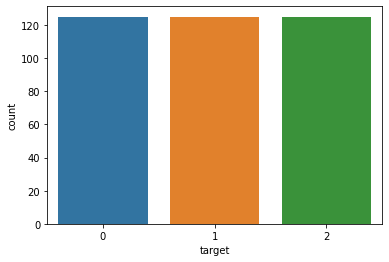

In [79]:
sn.countplot(dataset['target'])


In [275]:
'''# Correlation Matrix
corrMatrix= dataset.corr()

fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches

sn.heatmap(corrMatrix, annot=True,linewidth=0.8)
plt.show()'''

'# Correlation Matrix\ncorrMatrix= dataset.corr()\n\nfig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches\n\nsn.heatmap(corrMatrix, annot=True,linewidth=0.8)\nplt.show()'

In [276]:
'''# Drop Column with perfect correlation
dataset.drop(columns={"icu"}, axis=1, inplace=True)'''

'# Drop Column with perfect correlation\ndataset.drop(columns={"icu"}, axis=1, inplace=True)'

In [183]:
X_train = dataset.loc[:,dataset.columns!='target']
y_train = dataset['target']

X_test = test.loc[:,dataset.columns!='target']
y_test = test['target']

In [ ]:
'''# finding interquartile range
from numpy import mean
from numpy import std
# calculate summary statistics
data_mean, data_std = mean(X_train), std(X_train)
# identify outliers
cut_off = data_std*3 
lower, upper = data_mean - cut_off, data_mean + cut_off


# replacing outliers with mean value
for i in range(X_train.shape[1]):
  for j in range(len(X_train)):
    if dataset.iloc[j,i]<=lower[i]:
      dataset.iloc[j,i]= data_mean[i]


for i in range(X_train.shape[1]):
  for j in range(len(X_train)):
    if dataset.iloc[j,i]>=upper[i]:
      dataset.iloc[j,i]= data_mean[i]
      #dataset.iloc[j,i]= np.NaN
'''

In [184]:
X_train.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [185]:
X_train

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,att11,att12,att13,att14,att15,att16,att17,att18,att19,att20,att21,att22,att23,att24,att25,att26,att27,att28,att29,att30,att31,att32,att33,att34,att35,att36,att37,att38,att39,att40,...,att681,att682,att683,att684,att685,att686,att687,att688,att689,att690,att691,att692,att693,att694,att695,att696,att697,att698,att699,att700,att701,att702,att703,att704,att705,att706,att707,att708,att709,att710,att711,att712,att713,att714,att715,att716,att717,att718,att719,att720
0,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,...,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108
1,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,...,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256
2,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,...,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082
3,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,...,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671
4,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.14057

In [186]:
def Feature_dataset(X_train):
    X_train_fe=[]
    X_train_fe=pd.DataFrame(X_train_fe)
    for i in range(X_train.shape[1]):
       X_train_fe['pandas_SMA_4'] = X_train.iloc[:,i].rolling(window=4).mean()

    for i in range(X_train.shape[1]):
       X_train_fe['pandas_SMA_3'] = X_train.iloc[:,1].rolling(window=3).mean()

    for i in range(X_train.shape[1]):
       X_train_fe['CMA_4'] = X_train.iloc[:,i].expanding(min_periods=4).mean()
    
    X_train_fe['panda_min'] = X_train.min(axis=1)
    X_train_fe['panda_max'] = X_train.max(axis=1)


    num_groups= int(X_train.shape[1]/30)
    mean_hourly= []
    for i in range(len(X_train)):
      marker = 0;
      count = 0
      mean_hourly_per_example = [0.0]*num_groups;
      while(count<num_groups):
        mean_hourly_per_example[count] = mean(X_train.iloc[i,marker:marker+30]);
        count = count+1;
        marker+=30;
      #print(mean_hourly_per_example)
      mean_hourly.append(mean_hourly_per_example);
    mean_hourly = pd.DataFrame(mean_hourly,columns=['houravg1','houravg2','houravg3','houravg4','houravg5','houravg6','houravg7','houravg8','houravg9','houravg10','houravg11','houravg12','houravg13','houravg14','houravg15','houravg16','houravg17','houravg18','houravg19','houravg20','houravg21','houravg22','houravg23','houravg24'])
    mean_hourly

    X_train=pd.concat([X_train_fe,mean_hourly],axis=1)

    X_train.fillna(X_train.mean(),inplace=True)

    return X_train

In [149]:
'''X_train_fe=[]
X_train_fe=pd.DataFrame(X_train_fe)
for i in range(X_train.shape[1]):
  X_train_fe['pandas_SMA_4'] = X_train.iloc[:,i].rolling(window=4).mean()

for i in range(X_train.shape[1]):
  X_train_fe['pandas_SMA_3'] = X_train.iloc[:,1].rolling(window=3).mean()
'''
  


In [150]:
X_train_fe

,pandas_SMA_4,pandas_SMA_3
0,NaN,NaN
1,NaN,NaN
2,NaN,-0.118149
3,-0.123779,-0.132003
4,-0.134146,-0.127110
...,...,...
370,-0.316227,-0.306684
371,-0.308176,-0.329601
372,-0.298769,-0.325579
373,-0.287942,-0.231319


In [151]:
for i in range(X_train.shape[1]):
  X_train_fe['CMA_4'] = X_train.iloc[:,i].expanding(min_periods=4).mean()


In [152]:
  X_train_fe['panda_max'] = X_train.max(axis=1)

In [153]:
  X_train_fe['panda_min'] = X_train.min(axis=1)

In [154]:
num_groups= int(X_train.shape[1]/30)
mean_hourly= []
for i in range(len(X_train)):
  marker = 0;
  count = 0
  mean_hourly_per_example = [0.0]*num_groups;
  while(count<num_groups):
    mean_hourly_per_example[count] = mean(X_train.iloc[i,marker:marker+30]);
    count = count+1;
    marker+=30;
  #print(mean_hourly_per_example)
  mean_hourly.append(mean_hourly_per_example);
mean_hourly = pd.DataFrame(mean_hourly,columns=['houravg1','houravg2','houravg3','houravg4','houravg5','houravg6','houravg7','houravg8','houravg9','houravg10','houravg11','houravg12','houravg13','houravg14','houravg15','houravg16','houravg17','houravg18','houravg19','houravg20','houravg21','houravg22','houravg23','houravg24'])
mean_hourly

,houravg1,houravg2,houravg3,houravg4,houravg5,houravg6,houravg7,houravg8,houravg9,houravg10,houravg11,houravg12,houravg13,houravg14,houravg15,houravg16,houravg17,houravg18,houravg19,houravg20,houravg21,houravg22,houravg23,houravg24
0,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,0.155513,2.024859,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108
1,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,2.067765,1.346689,-0.154076,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256
2,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,2.301892,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082
3,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,1.502996,-0.047199,1.496166,-0.138537,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671
4,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,0.053210,1.870121,1.028763,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,-0.457814,-0.457814,-0.457814,-0.457814,-0.457814,-0.457814,-0.457814,-0.457814,-0.457814,-0.457814,-0.457814,-0.457814,-0.457814,1.665347,-0.133757,1.576423,-0.044137,0.550175,0.528990,0.756735,1.032427,-0.457814,0.935001,-0.457814
371,-0.312653,-0.312653,-0.312653,-0.312653,-0.312653,-0.312653,-0.312653,-0.312653,-0.312653,-0.312653,-0.312653,-0.312653,-0.312653,-0.312653,0.573850,-0.003355,-0.312653,-0.312653,-0.312653,2.458609,0.227866,-0.312653,1.795237,0.575543
372,-0.206270,-0.206270,-0.206270,-0.206270,-0.206270,-0.206270,-0.206270,0.420289,4.022726,-0.111345,-0.206270,-0.206270,-0.206270,-0.206270,-0.206270,-0.206270,-0.206270,-0.206270,-0.206270,-0.206270,-0.206270,-0.206270,-0.206270,-0.206270
373,-0.175033,-0.175033,-0.175033,-0.175033,-0.175033,-0.175033,-0.175033,-0.175033,-0.175033,-0.175033,-0.175033,-0.175033,-0.175033,-0.175033,3.106222,0.744505,-0.175033,-0.175033,-0.175033,-0.175033,-0.175033,-0.175033,-0.175033,-0.175033


In [155]:
mean_hourly

,houravg1,houravg2,houravg3,houravg4,houravg5,houravg6,houravg7,houravg8,houravg9,houravg10,houravg11,houravg12,houravg13,houravg14,houravg15,houravg16,houravg17,houravg18,houravg19,houravg20,houravg21,houravg22,houravg23,houravg24
0,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,0.155513,2.024859,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108
1,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,2.067765,1.346689,-0.154076,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256
2,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,2.301892,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082
3,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,1.502996,-0.047199,1.496166,-0.138537,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671
4,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,0.053210,1.870121,1.028763,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,-0.457814,-0.457814,-0.457814,-0.457814,-0.457814,-0.457814,-0.457814,-0.457814,-0.457814,-0.457814,-0.457814,-0.457814,-0.457814,1.665347,-0.133757,1.576423,-0.044137,0.550175,0.528990,0.756735,1.032427,-0.457814,0.935001,-0.457814
371,-0.312653,-0.312653,-0.312653,-0.312653,-0.312653,-0.312653,-0.312653,-0.312653,-0.312653,-0.312653,-0.312653,-0.312653,-0.312653,-0.312653,0.573850,-0.003355,-0.312653,-0.312653,-0.312653,2.458609,0.227866,-0.312653,1.795237,0.575543
372,-0.206270,-0.206270,-0.206270,-0.206270,-0.206270,-0.206270,-0.206270,0.420289,4.022726,-0.111345,-0.206270,-0.206270,-0.206270,-0.206270,-0.206270,-0.206270,-0.206270,-0.206270,-0.206270,-0.206270,-0.206270,-0.206270,-0.206270,-0.206270
373,-0.175033,-0.175033,-0.175033,-0.175033,-0.175033,-0.175033,-0.175033,-0.175033,-0.175033,-0.175033,-0.175033,-0.175033,-0.175033,-0.175033,3.106222,0.744505,-0.175033,-0.175033,-0.175033,-0.175033,-0.175033,-0.175033,-0.175033,-0.175033


In [156]:
X_train_fe

,pandas_SMA_4,pandas_SMA_3,CMA_4,panda_max,panda_min
0,NaN,NaN,NaN,11.802532,-0.099108
1,NaN,NaN,NaN,8.141241,-0.155256
2,NaN,-0.118149,NaN,12.016072,-0.100082
3,-0.123779,-0.132003,-0.123779,8.387104,-0.140671
4,-0.134146,-0.127110,-0.127139,8.679124,-0.140576
...,...,...,...,...,...
370,-0.316227,-0.306684,-0.084132,3.681743,-0.457814
371,-0.308176,-0.329601,-0.084746,5.275024,-0.312653
372,-0.298769,-0.325579,-0.085072,7.830511,-0.206270
373,-0.287942,-0.231319,-0.085312,8.752884,-0.175033


In [157]:
X_train=pd.concat([X_train_fe,mean_hourly],axis=1)

In [158]:
X_train

,pandas_SMA_4,pandas_SMA_3,CMA_4,panda_max,panda_min,houravg1,houravg2,houravg3,houravg4,houravg5,houravg6,houravg7,houravg8,houravg9,houravg10,houravg11,houravg12,houravg13,houravg14,houravg15,houravg16,houravg17,houravg18,houravg19,houravg20,houravg21,houravg22,houravg23,houravg24
0,NaN,NaN,NaN,11.802532,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,0.155513,2.024859,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108
1,NaN,NaN,NaN,8.141241,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,2.067765,1.346689,-0.154076,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256
2,NaN,-0.118149,NaN,12.016072,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,2.301892,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082
3,-0.123779,-0.132003,-0.123779,8.387104,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,1.502996,-0.047199,1.496166,-0.138537,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671
4,-0.134146,-0.127110,-0.127139,8.679124,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,0.053210,1.870121,1.028763,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,-0.316227,-0.306684,-0.084132,3.681743,-0.457814,-0.457814,-0.457814,-0.457814,-0.457814,-0.457814,-0.457814,-0.457814,-0.457814,-0.457814,-0.457814,-0.457814,-0.457814,-0.457814,1.665347,-0.133757,1.576423,-0.044137,0.550175,0.528990,0.756735,1.032427,-0.457814,0.935001,-0.457814
371,-0.308176,-0.329601,-0.084746,5.275024,-0.312653,-0.312653,-0.312653,-0.312653,-0.312653,-0.312653,-0.312653,-0.312653,-0.312653,-0.312653,-0.312653,-0.312653,-0.312653,-0.312653,-0.312653,0.573850,-0.003355,-0.312653,-0.312653,-0.312653,2.458609,0.227866,-0.312653,1.795237,0.575543
372,-0.298769,-0.325579,-0.085072,7.830511,-0.206270,-0.206270,-0.206270,-0.206270,-0.206270,-0.206270,-0.206270,-0.206270,0.420289,4.022726,-0.111345,-0.206270,-0.206270,-0.206270,-0.206270,-0.206270,-0.206270,-0.206270,-0.206270,-0.206270,-0.206270,-0.206270,-0.206270,-0.206270,-0.206270
373,-0.287942,-0.231319,-0.085312,8.752884,-0.175033,-0.175033,-0.175033,-0.175033,-0.175033,-0.175033,-0.175033,-0.175033,-0.175033,-0.175033,-0.175033,-0.175033,-0.175033,-0.175033,-0.175033,3.106222,0.744505,-0.175033,-0.175033,-0.175033,-0.175033,-0.175033,-0.175033,-0.175033,-0.175033


In [163]:
X_train.fillna(X_train.mean(),inplace=True)

In [187]:
X_train= Feature_dataset(X_train)

In [188]:

X_test= Feature_dataset(X_test)

In [196]:
from sklearn.preprocessing import MinMaxScaler,RobustScaler


scale_robust= RobustScaler().fit(X_train)
X_train = scale_robust.transform(X_train)

scale_robust= RobustScaler().fit(X_test)
X_test = scale_robust.transform(X_test)

scaling = MinMaxScaler(feature_range=(-1, 1)).fit(X_train)
X_train = scaling.transform(X_train)

scaling_test = MinMaxScaler(feature_range=(-1, 1)).fit(X_test)
X_test = scaling_test.transform(X_test)

In [281]:
'''from sklearn.decomposition import PCA
pca_t = PCA(n_components=100)
X_train = pca_t.fit_transform(X_train)

X_test = pca_t.fit_transform(X_test)
'''

'from sklearn.decomposition import PCA\npca_t = PCA(n_components=100)\nX_train = pca_t.fit_transform(X_train)\n\nX_test = pca_t.fit_transform(X_test)\n'

## Splitting the dataset into the Training set and Test set

In [282]:
"""from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 786,stratify=Y)"""

'from sklearn.model_selection import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 786,stratify=Y)'

### Building Models

Defining Function for Model Performance evaluation

In [197]:
def eval_result(model_name,X,y,y_pred):
    from matplotlib import pyplot as plt

    train_accuracy = accuracy_score(y, y_pred)
    print(f'accuracy is {train_accuracy}')
    
    #plot_roc_curve(model_name, X, y)

    #plot_precision_recall_curve(model_name,X,y)
    print(classification_report(y,y_pred,digits=5))
    plot_confusion_matrix(model_name, X, y,cmap=plt.cm.pink, normalize = 'all')


In [198]:
# user defined function to calculate model training time

def run_model(model,X_train,y_train,verbose=True):
    t0=time.time()
    if verbose== False:
        model.fit(X_train,y_train.ravel(),verbose=0,early_stopping_rounds=10, eval_metric="logloss")
    else :
        model.fit(X_train,y_train.ravel())
    
    time_taken= time.time()- t0

    print(f'Time taken: {time_taken}')

### XGBOOST 

In [199]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
 
#xgb = XGBClassifier(objective='multi:softmax',num_class=3)

xgb = XGBClassifier(random_state=0,objective='multi:softmax')

params = {
   "learning_rate"   : [0.05, 0.10, 0.15, 0.20, 0.30],
    "max_depth"       : [3, 4, 5, 6, 8, 10, 12, 15],
    "min_child_weight": [1, 3, 5, 7],
    "gamma"           : [0.0, 0.1, 0.2, 0.3, 0.4],
    "colsample_bytree": [0.3, 0.4, 0.5, 0.7]
}


clf = RandomizedSearchCV(xgb ,
                         param_distributions = params, 
                         cv=5,
                         scoring="accuracy",
                         n_jobs= 10,
                         verbose = 1,
                         random_state=786)


run_model(clf,X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.


Time taken: 3.5178492069244385


[Parallel(n_jobs=10)]: Done  50 out of  50 | elapsed:    3.4s finished


In [173]:
print(clf.best_estimator_)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.1,
              learning_rate=0.2, max_delta_step=0, max_depth=15,
              min_child_weight=5, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [200]:
y_predtest= clf.predict(X_test)

y_predtrain = clf.predict(X_train)

In [201]:
y_predtest

array([2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [202]:
y_test

0      0
1      0
2      0
3      0
4      0
      ..
370    2
371    2
372    2
373    2
374    2
Name: target, Length: 375, dtype: int64

accuracy is 1.0
              precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000       125
           1    1.00000   1.00000   1.00000       125
           2    1.00000   1.00000   1.00000       125

    accuracy                        1.00000       375
   macro avg    1.00000   1.00000   1.00000       375
weighted avg    1.00000   1.00000   1.00000       375



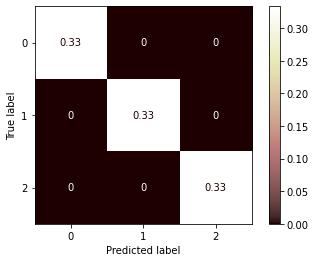

In [194]:
eval_result(clf,X_train,y_train,y_predtrain)

accuracy is 0.336
              precision    recall  f1-score   support

           0    0.49580   0.47200   0.48361       125
           1    0.20588   0.33600   0.25532       125
           2    0.48077   0.20000   0.28249       125

    accuracy                        0.33600       375
   macro avg    0.39415   0.33600   0.34047       375
weighted avg    0.39415   0.33600   0.34047       375



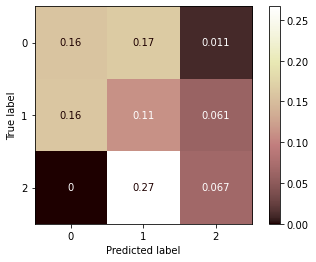

In [195]:
eval_result(clf,X_test,y_test,y_predtest)

In [292]:
# checking if distribution in target variable in train and test data is identical

#https://towardsdatascience.com/why-you-may-be-getting-low-test-accuracy-try-this-simpstatistical-tests-30585b7ee4fa

from scipy import stats
stats.ks_2samp(y_train,y_test)


Ks_2sampResult(statistic=0.0, pvalue=1.0)

statistics low value tells us that distribution is not much different and pvalue is one which tells us we cannot reject the null hypothesis that the distributions are actually identical because the pvalue is not small enough 